# Session 4: Fitting to arbitrary functions

<div class="alert alert-success"> <p><b>Intended learning outcomes:</b> </p>
By the end of this session, you should be able to:
<ul>
<li> fit data to any arbitrary function using scipy.optimize.curve_fit; </li>
<li> quantitatively evaluate the goodness of fit;  </li>
<li> reach physical conclusions based on these results. </li>
</div>

We've already seen how to fit histograms to a Gaussian, and how to use a polynomial to fit a set of data. The last thing we're going to do in this Data Analysis part of the course is to see how to perform a fit to an arbitrary function. 

In these examples, we'll be looking at whether a Lorentzian or Gaussian functions provide a better fit to some optical lineshape data. However, you can use the same method to fit *any* function, provided you can write a suitable Python function to describe your target "fit" function.

### Context for this example

The data we'll use for this session is taken from the Lab 3 Zeeman effect experiment, which some of you will do yourselves in PHAS0058. 

The Zeeman effect occurs when a spectral line is split into different components by a magnetic field. The physics of the Zeeman effect will be covered in detail in PHAS0023 "Atomic and Molecular Physics".

The Lab 3 experiment examines how the lines in the emission spectrum of a mercury discharge lamp split under a magnetic field. The student records the spectrum using a CCD camera, which yields data in the form of recorded intensity (in counts per second) vs pixel position (in pixels). 

We're not going to be considering the *positions* of the spectral lines in this task, instead we're going to be looking at the *lineshapes*. Rather than a spectral line with a single energy, the line is broadened into a wider peak by various physical effects. For example, the uncertainty principle leads to broadening which has a Lorentzian form, while there will also be thermal broadening effects, which are Gaussian in nature (there are also several other sources of broadening, with different effects). In theory, for this experiment, Lorentzian broadening is expected to dominate.

In this task we will look at an experimental spectral line recorded by a student in the Lab 3 experiment, fit it to both a Gaussian and Lorentzian, and determine which provides a better fit.

### Getting started with the code

First, we'll import the modules we will need. The new function we import in the cell below comes from the scipy.optimize library - more on this later, when we come to use it. 

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit # we're importing just this one function from scipy.optimize

plt.rcParams["patch.force_edgecolor"] = True # include outlines on histograms etc



Now we can import the csv (Comma Separated Value) file with the data the student collected, and plot it. You will need to download this file from Moodle, and as usual, put it in the same directory as this notebook.

<IPython.core.display.Javascript object>


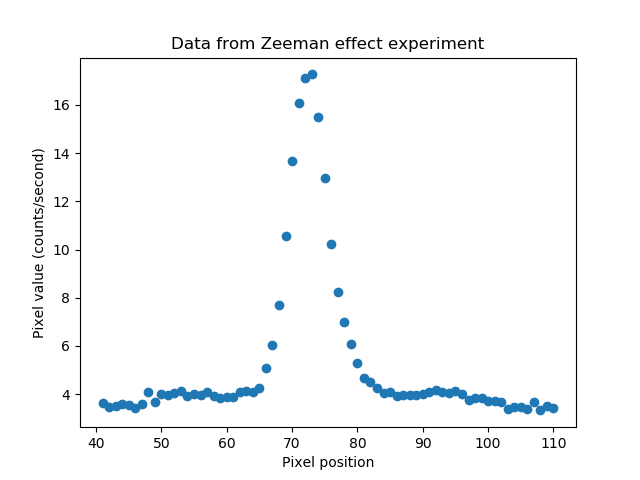

In [2]:
# import the data...
xdata,ydata = np.loadtxt('Zeeman_data.csv',delimiter=",",unpack=True) # reminder: need to set delimiter for csv files

# ...and plot it.
plt.figure()
plt.plot(xdata,ydata, 'o')
plt.xlabel("Pixel position")
plt.ylabel("Pixel value (counts/second)")
plt.title("Data from Zeeman effect experiment");

We can see that we have a single peak with a constant background level. It looks feasible to attempt fitting this to a Gaussian.


In order to use `curve_fit` to fit this to a Gaussian, we need to write a "target" function to fit to, which in this case will be


$$
f(x) = y_0 + h \exp \left(\frac{-(x-x_0)^2}{2 \sigma^2}\right)
$$

(This is a slightly different definition from the one we used when we were fitting histograms to Gaussians in Session 2. Can you see why?)

The parameters for our Gaussian fit will be the mean value (`x0`), the standard deviation (`sigma`), the background value `y0` and the peak height, `h`. Here is a function that will do exactly this.

In [3]:
def gaussian(x,x0,sigma, y0, h):
    '''Returns a single value or 1D array of Gaussian function values for 
    - input x-value or array of x-values: x
    - mean value of distribution: x0
    - standard deviation of distribution: sigma
    - background value y0
    - peak height, h (measured from background level y0)'''
    gauss = h * np.exp(-(x-x0)**2/(2*sigma**2)) + y0 # the gaussian itself
    return gauss

The three parameters, x0, y0 and sigma, are (as yet) unknown. To find them, we use the scipy.optimize.curve_fit function. The full documentation for this is here: http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit

We're going to do this in the simplest way possible for the moment, by just sending curve_fit the target function (our "`gaussian`" function), the independent variable (`xdata`) and the dependent variable (`ydata`). We can also, optionally, choose to send an initial guess of the parameters, as well as weightings for each of the ydata data points, but for the moment we won't do that.

The `curve_fit` routine returns two arrays. 
 * The first of these is an array of the fitted parameters - in our case this array will have four elements, as we have four parameters, `x0`, `sigma`, `y0`, and `h`.
 * The second is the matrix of covariance - an indication of the goodness of fit. We covered this in Session 3 when we were doing polynomial fitting.
 
 Let's do this, and see what results we get back:

In [4]:
#popt: Optimized parameters
#pcov: matrix of covariance.
popt,pcov = curve_fit(gaussian,xdata,ydata)

print ("popt :\n", popt)
print ("pcov :\n", pcov)

popt :
 [1.         1.         5.30499999 1.        ]
pcov :
 [[inf inf inf inf]
 [inf inf inf inf]
 [inf inf inf inf]
 [inf inf inf inf]]


C:\Program Files\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


We can see that this hasn't worked so well - `curve_fit` hasn't been able to find a fit to the data.

Instead, we'll try to make life easier for `curve_fit` by giving an initial guess for the parameters. From looking at the plot of the data, we can see that the peak is at around $x=75$, and the background around $y=3.5$. We'll try a value of 10 for $\sigma$. These values need to be given in the form of a python list of numbers, in the same order as parameters are given to our "`gaussian`" function. Remember - in Python we use `[` square brackets `]` to define a list, with the elements separated by commas.

In [5]:
guess = [75,10,3.5,18] # list of initial guess parameters
# what type of object does the variable "guess" represent?
print ("The variable 'guess' is a ", type(guess) )

The variable 'guess' is a  <class 'list'>


Now we can retry the fit:

In [6]:
popt,pcov = curve_fit(gaussian,xdata,ydata,p0=guess)
print ("popt :\n", popt)
print ("pcov :\n", pcov)

popt :
 [72.50930905  3.01525268  3.85742572 13.40680375]
pcov :
 [[ 2.02507205e-03 -3.74999230e-10  4.61324597e-12  1.63272286e-09]
 [-3.74999230e-10  2.22561783e-03 -6.30519907e-04 -4.05620889e-03]
 [ 4.61324597e-12 -6.30519907e-04  1.98236679e-03 -1.40174504e-03]
 [ 1.63272286e-09 -4.05620889e-03 -1.40174504e-03  3.10175059e-02]]


This has worked (or it should have done)! We can use the information from the matrix of covariance to calculate the error on each parameter, just as we did in the previous session for the polynomial coefficients. Remember, the error on the parameters are given by the *square roots* of the diagonal elements of the matrix of covariance.


**A python aside / hint: ** When dealing with an array like `popt` that contains numbers each representing different variables, it's sometimes useful to be able to "unpack" the array into different variables - we've already seen examples of this in the code cell above and in the second code cell when unpacking the data from the file. To unpack `popt`, we could use a line of code like:

           x0_fit, sigma_fit, y0_fit, h_fit = popt

If we wanted to then calculate the fitted line at a given x-value (in this case at x = 65), we could then use something like:
        
           fitted_point = gaussian(65, x0_fit, sigma_fit, y0_fit, h_fit)
           
or, if we don't want/need to assign individual variable names to the elements of `popt` (or whichever array we are dealing with), we could use:

           fitted_point = gaussian(65, popt[0], popt[1], popt[2], popt[3])
           
This is a bit unwieldy though, so sometimes it's useful to be able to unpack the array automatically when calling a function by using \* syntax, like this:

           fitted_point = gaussian(65, *popt)
This is much easier to deal with! You can find a fuller discussion of this in [Hill: Learning Scientific Programming with Python](http://sfx.ucl.ac.uk/sfx_local?ctx_ver=Z39.88-2004&ctx_enc=info:ofi/enc:UTF-8&ctx_tim=2016-07-18T13%3A15%3A47IST&url_ver=Z39.88-2004&url_ctx_fmt=infofi/fmt:kev:mtx:ctx&rfr_id=info:sid/primo.exlibrisgroup.com:primo3-Journal-UCL_LMS_DS&rft_val_fmt=info:ofi/fmt:kev:mtx:book&rft.genre=book&rft.atitle=&rft.jtitle=&rft.btitle=Learning%20scientific%20programming%20with%20Python&rft.aulast=Hill&rft.auinit=&rft.auinit1=&rft.auinitm=&rft.ausuffix=&rft.au=Hill,%20Christian,%201974-,%20author&rft.aucorp=&rft.volume=&rft.issue=&rft.part=&rft.quarter=&rft.ssn=&rft.spage=&rft.epage=&rft.pages=&rft.artnum=&rft.issn=&rft.eissn=&rft.isbn=9781107075412&rft.sici=&rft.coden=&rft_id=info:doi/&rft.object_id=&rft.856_url=&rft_dat=%3CUCL_LMS_DS%3E002240476%3C/UCL_LMS_DS%3E&rft.eisbn=&rft_id=info:oai/&req.language=eng) section 2.4.3 (page 49).

The code cell below demonstrates that the two methods do give identical results:

In [7]:
# specifying the elements by hand:
print("At x = 65 our fitted Gaussian has a value of: ", gaussian(65, popt[0], popt[1], popt[2], popt[3]))

# use *syntax to unpack the elements of popt automatically:
print("Calculating the same value using * syntax:    ", gaussian(65,*popt)) 
print("Both give the same result!")

At x = 65 our fitted Gaussian has a value of:  4.460698388343549
Calculating the same value using * syntax:     4.460698388343549
Both give the same result!


<div class="alert alert-success"> 
In the cell below, you should:
<ul>
<li> calculate the errors on the parameters </li>
<li>output each parameter with its error and an appropriate text string </li>
<li>plot the original data and the fitted line on a single, appropriately labelled graph </li>
</ul>
</div>

Parameter no. 1  is  72.50930904832356  with error  0.04500080058737785
Parameter no. 2  is  3.0152526754151086  with error  0.04717645417786105
Parameter no. 3  is  3.8574257202078033  with error  0.04452377780513221
Parameter no. 4  is  13.406803754684061  with error  0.17611787490240707


<IPython.core.display.Javascript object>


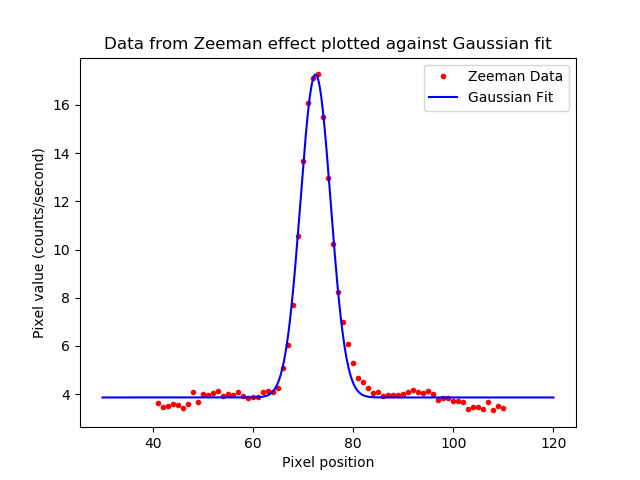

Text(0.5,1,'Data from Zeeman effect plotted against Gaussian fit')

In [8]:
### STUDENT COMPLETED CELL ###

x = np.linspace(30, 120, 500) # creates array of 500 equally spaced points between 30 and 120
y = gaussian(x, popt[0], popt[1], popt[2], popt[3]) # calculates y values for x array using Gaussian function
for i in range(np.size(popt)): # creates for loop to print each order with corresponding coefficient and error
    print ("Parameter no.", i+1, " is ", popt[i], " with error ", np.sqrt(np.diag(pcov)[i]))

# plots a new figure of Zeeman data against Gaussian
plt.figure()
plt.plot(xdata, ydata, 'r.', label="Zeeman Data") # plots Zeeman data points as red dots
plt.plot(x, y, 'b-', label="Gaussian Fit") # plots Gaussian as a blue line
plt.legend()
plt.xlabel("Pixel position")
plt.ylabel("Pixel value (counts/second)")
plt.title("Data from Zeeman effect plotted against Gaussian fit")

If you've done this correctly, you should obtain a good fit to the data.

In theory we'd expect a Lorentzian to produce a better fit for this data. Now you're going to try this out and see if this is what we find for this particular data set!

The appropriate form for this is 
$$
f(x) = y_0 + \frac{h}{1 + ((x - x_0)/b)^2}
$$
where $y_0$ is the background level, $x_0$ is the peak position and $b$ is the half-width at half-maximum (HWHM) of the peak, and $h$ the height of the peak relative to the background level.

<div class="alert alert-success"> 
First, write a properly formatted python function, similar in form to the "gaussian" function above, that will return a Lorentzian function for these parameters.
</div>

In [9]:
### STUDENT COMPLETED CELL ###

def lorentzian(x,x0,y0, b, h): # defining Lorentzian function
    '''Returns a single value or 1D array of Lorentzian function values for:
    - input x-value or array of x-values: x
    - mean value of distribution: x0
    - half-width at half-maximum: b
    - background value: y0
    - peak height: h (measured from background level y0)'''
    lorentz = h / (1 + ((x - x0)/b)**2) + y0 # Lorentzian function
    return lorentz # returns y value of Lorentzian given inputs

<div class="alert alert-success"> 
Now provide an initial guess for these parameters, and use curve_fit to calculate the best Lorentzian fit for this data. Output the calculated parameters and the matrix of covariance, just like we did for the Gaussian fit.
</div>

In [10]:
### STUDENT COMPLETED CELL ###

guess1 = [75,3.5,5,18] # initial guess parameters for Lorentzian

popt1, pcov1 = curve_fit(lorentzian,xdata,ydata,p0=guess1) # popt1 is optimal values for parameters, pcov1 is covariance matrix
print ("popt :\n", popt1)
print ("pcov :\n", pcov1)

popt :
 [72.48067426  3.36146275  3.08298492 14.88521907]
pcov :
 [[ 3.41538242e-03 -3.26746267e-06  1.97171167e-06  1.19672484e-06]
 [-3.26746267e-06  4.90700178e-03 -3.39327090e-03 -1.07974715e-03]
 [ 1.97171167e-06 -3.39327090e-03  9.19579115e-03 -1.57728341e-02]
 [ 1.19672484e-06 -1.07974715e-03 -1.57728341e-02  7.98982891e-02]]


<div class="alert alert-success"> 
Now use these results to
<ul>
<li>calculate the error on each parameter</li>
<li>output each parameter with its error (and an appropriate text string)</li>
<li>plot the data, the fitted Gaussian and the fitted Lorentzian, all on the same labelled graph.</li>
</ul>
</div>

Parameter no. 1  is  72.4806742642823  with error  0.058441273297197394
Parameter no. 2  is  3.3614627524454823  with error  0.07004999483783356
Parameter no. 3  is  3.082984922309485  with error  0.09589468780710263
Parameter no. 4  is  14.885219071655408  with error  0.28266285407766345


<IPython.core.display.Javascript object>


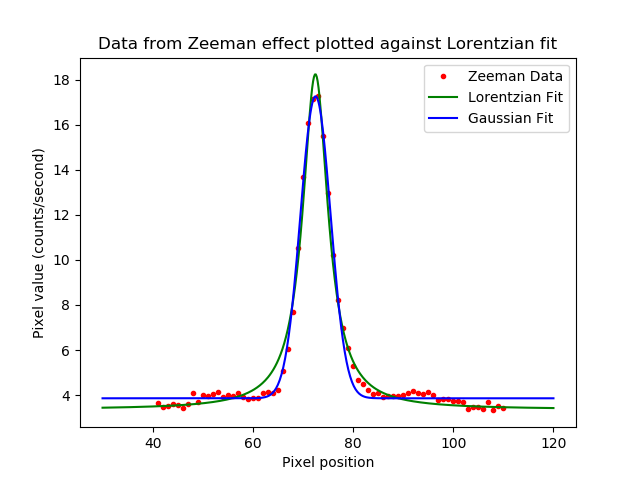

Text(0.5,1,'Data from Zeeman effect plotted against Lorentzian fit')

In [11]:
### STUDENT COMPLETED CELL ###

x1 = np.linspace(30, 120, 500) # creates array of 500 equally spaced points between 30 and 120
y1 = lorentzian(x1, popt1[0], popt1[1], popt1[2], popt1[3]) # calculates y values for x array using Gaussian function
for i in range(np.size(popt1)): # creates for loop to print each order with corresponding coefficient and error
    print ("Parameter no.", i+1, " is ", popt1[i], " with error ", np.sqrt(np.diag(pcov1)[i]))

# plots a new figure of Zeeman data against Gaussian
plt.figure()
plt.plot(xdata, ydata, 'r.', label="Zeeman Data") # plots Zeeman data points as red dots
plt.plot(x1, y1, 'g-', label="Lorentzian Fit") # plots Lorentzian as a green line
plt.plot(x, y, 'b-', label="Gaussian Fit") # plots Gaussian as a blue line
plt.legend()
plt.xlabel("Pixel position")
plt.ylabel("Pixel value (counts/second)")
plt.title("Data from Zeeman effect plotted against Lorentzian fit")

### Evaluating the goodness of fit

So now we have two potential fits to our data. Looking at them, it's hard to tell which one provides the better fit. We can do this quantitatively by calculating $\chi^2$ for each fit, in the same way as we did in the previous session. 

We'll also need to know the y-error on the data points for this - which for this experiment were estimated to be $\pm 1$ counts/second.

#### 1. Gaussian.

First we'll look at the Gaussian fit. 

<div class="alert alert-success"> 
In the cell below, 
<ul>
<li>calculate the residuals divided by the y-error</li>
<li>calculate the number of degrees of freedom</li>
<li>hence calculate $\chi^2$ for the Gaussian fit.</li>
</ul>
(Refer back to the previous session if you need a reminder of any of the definitions)
</div>


In [12]:
### STUDENT COMPLETED CELL ###

y_error = 1 # error in y of 1 count/second
residual = [] # creates empty array for residuals
r_squared = [] # creates empty array for residuals squared

for i in range(len(xdata)): # for loop to calculate each residual and residual squared, then added to empty array above
    r = (gaussian(xdata[i], popt[0], popt[1], popt[2], popt[3]) - ydata[i])/y_error # calculation of residual with error
    rsqrd = (r)**2 # calculation of residual squared
    residual.append(r) # adds residual to empty array
    r_squared.append(rsqrd) # adds residual squared to empty array
    
sumrsqrd = np.sum(r_squared) # calculates sum of residuals squared
print("The sum of the squares of the residuals is:", sumrsqrd)

v = len(xdata) - len(popt) # calculates degrees of freedom
r_X = sumrsqrd/v # calculates reduced X^2 term for Gaussian
print("The number of degrees of freedom is:", v)
print("The reduced X^2 term is:", r_X)

The sum of the squares of the residuals is: 7.060808318722573
The number of degrees of freedom is: 66
The reduced X^2 term is: 0.1069819442230693


#### 2. Lorentzian

<div class="alert alert-success"> Now do the same for the Lorentzian fit, in the cell below.</div>

In [13]:
### STUDENT COMPLETED CELL ###

residual1 = [] # creates empty array for residuals
r_squared1 = [] # creates empty array for residuals squared

for i in range(len(xdata)): # for loop to calculate each residual and residual squared, then added to empty array above
    r1 = (lorentzian(xdata[i], popt1[0], popt1[1], popt1[2], popt1[3]) - ydata[i])/y_error # calculation of residual with error
    rsqrd1 = (r1)**2 # calculation of residual squared
    residual1.append(r1) # adds residual to empty array
    r_squared1.append(rsqrd1) # adds residual squared to empty array
    
sumrsqrd1 = np.sum(r_squared1) # calculates sum of residuals squared
print("The sum of the squares of the residuals is:", sumrsqrd1)

v1 = len(xdata) - len(popt1) # calculates degrees of freedom
r_X1 = sumrsqrd1/v1 # calculates reduced X^2 term for Lorentzian
print("The number of degrees of freedom is:", v1)
print("The reduced X^2 term is:", r_X1)

The sum of the squares of the residuals is: 12.723187245222357
The number of degrees of freedom is: 66
The reduced X^2 term is: 0.19277556432155088


<div class="alert alert-success">
<b> Are these the results you'd expect? Discuss briefly in a text cell.</b>
</div>

### STUDENT COMPLETED TEXT CELL ###

No, these are not the results I had expected. This is because I had expected the Lorentzian to provide a better fit than the Gaussian. However by looking at the reduced $\chi^2$ term, the value for the Lorentzian is further from $1$ at a value of $\chi^2=17.489$, where as the value for the Gaussian is closer to $1$ with a value of $\chi^2=15.986$. This suggests that the Gaussian is a better fit of the data obtained from the Zeeman effect experiment, than the Lorentzian.

### Analysing the residuals

Another way of verifying the validity of our fits is to check the distribution of the residuals, and see if they follow a normal (Gaussian) distribution. Again, follow the same procedure as we did in the previous session and check the distribution of the calculated residuals for both fits. 




<div class="alert alert-success">
Do this in the code cells below. 
<ul>
<li>You can copy, paste and edit code from Session 3 if you want, rather than writing this from scratch. </li>
<li>Then, use a text cell to discuss (briefly) what you conclude from these results.</li>
<li> You will also find it useful to look at the $x_0$ and $\sigma$ of the pdf of the residuals. Try changing your value of the yerror in the data (that you used to calculate the $\chi^2$) to the $\sigma$ you obtain here. What does this tell you?</li>
<li>Don't forget to change the yerror back to the value recorded by the student before submitting!</li>
</ul>
</div>

The Mean is -2.1760387777395147e-10 
The Standard Deviation is 0.31759831590779153


<IPython.core.display.Javascript object>


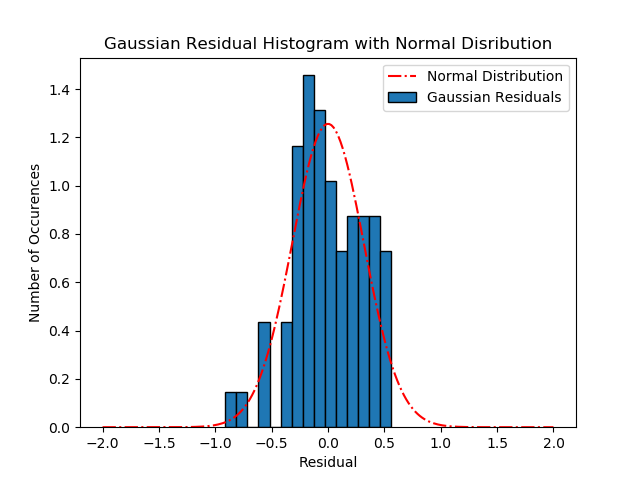

Text(0.5,1,'Gaussian Residual Histogram with Normal Disribution')

In [14]:
### STUDENT COMPLETED CELL ###

import scipy.stats as stats # imports new package needed for histogram plotting, as stats

x2 = np.linspace(-2, 2, 200) # array of 200 equally spaced points between -15 and 10

x0, sigma = stats.norm.fit(residual) # calculates mean and standard deviation of Gaussian residuals
print("The Mean is", x0, "\nThe Standard Deviation is", sigma)
gaussian_fn = stats.norm.pdf(x2, x0, sigma) # creates an array of y values for normal distribution
    
plt.figure() # plots new graph
plt.hist(residual, bins=15, density=True, edgecolor='k', label="Gaussian Residuals") # histogram with residuals data
plt.plot(x2,gaussian_fn,'r-.', label="Normal Distribution") # plots fitted normal line
plt.legend()
plt.xlabel("Residual")
plt.ylabel("Number of Occurences")
plt.title('Gaussian Residual Histogram with Normal Disribution')

The Mean is -1.0934566077988197e-09 
The Standard Deviation is 0.42633298932746316


<IPython.core.display.Javascript object>


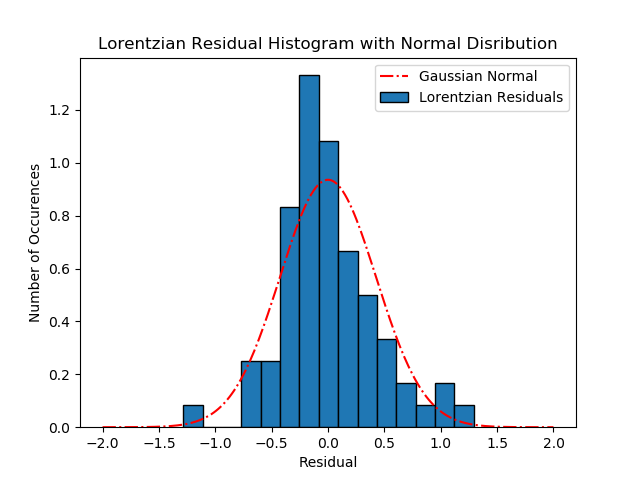

Text(0.5,1,'Lorentzian Residual Histogram with Normal Disribution')

In [15]:
### STUDENT COMPLETED CELL ###

x3 = np.linspace(-2, 2, 200) # array of 200 equally spaced points between -15 and 10

new_x0, new_sigma = stats.norm.fit(residual1) # calculates mean and standard deviation of Lorentzian residuals
print("The Mean is", new_x0, "\nThe Standard Deviation is", new_sigma)
lorentzian_fn = stats.norm.pdf(x3, new_x0, new_sigma) # creates an array of y values for Gaussian fitted line
    
plt.figure() # plots new graph
plt.hist(residual1, bins=15, density=True, edgecolor='k', label="Lorentzian Residuals") # histogram with residuals data
plt.plot(x3, lorentzian_fn,'r-.', label="Gaussian Normal") # plots fitted normal line
plt.legend()
plt.xlabel("Residual")
plt.ylabel("Number of Occurences")
plt.title('Lorentzian Residual Histogram with Normal Disribution')

### STUDENT COMPLETED TEXT CELL ###

Looking at the results on the 2 graphs above, the central bin of the Gaussian residual graph is higher than that of the central Lorentzian residual bin. The mean of the Gaussian is higher at $x_0=-1.219$, whereas the Lorentzian is $x_0=-1.447$. The standard deviation of the Gaussian is lower at $\sigma=0.317$, whereas the Lorentzian is $\sigma=0.426$, which suggests that the Gaussian residuals have a lower spread, hence the Gaussian is a better fit of the data from the Zeeman effect experiment. This is the same conclusion from comparing the reduced $\chi^2$ terms of both the Gaussian and the Lorentzian.

By changing the standard deviation to $\sigma=0.317$ (the standard deviation from the Gaussian residuals), the value of the reduced $\chi^2$ term for the Gaussian became $1.065$ and the Lorentzian became $1.918$. When changing to $\sigma=0.426$ (the standard deviation from the Lorentzian residuals), the value of $\chi^2$ for the Gaussian became $0.590$ and the Lorentzian became $1.062$. This suggests that the standard deviation of the normal distribution is much more accurate as an error for the data from the Zeeman effect experiment, than the estimated given error. This is because the reduced $\chi^2$ term was very close to 1, suggesting a very good fit of the data. The standard deviation of the Lorentzian residuals provides a better reduced $\chi^2$ value for the Lorenztian fit, whereas the standard deviation of the Gaussian residuals gives a better reduced $\chi^2$ value for the Gaussian fit.